# Credit Card Fraud Detection

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# get the dataset
dataset = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

<AxesSubplot:>

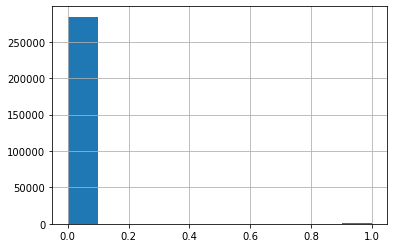

In [50]:
# some descriptive statistics
print(dataset.describe())
dataset.Class.hist()

In [64]:
# undersampling

# distinguish between the two classes
false = dataset[dataset.Class == 0]
true = dataset[dataset.Class == 1]
print("Number of true frauds: ", true.shape)
print("Number of false frauds: ", false.shape)

# we will take a few more than 2 times the number of true obsevations
balanced_false = false.sample(1000)

# merge the true and false observations
balanced_dataset = pd.concat([balanced_false, true])

# shuffle the rows
DATASET = pd.DataFrame(shuffle(balanced_dataset))

Number of true frauds:  (492, 31)
Number of false frauds:  (284315, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202205,134220.0,-1.532136,-0.635455,2.037052,-0.949382,1.696577,-1.034161,-0.060257,-0.018493,0.472222,...,-0.140775,-0.673854,-0.170881,-0.721677,0.528398,-0.561805,-0.170225,-0.140508,1.00,0
238845,149848.0,-0.815299,0.995734,0.711254,-0.958272,0.091578,-0.311825,0.018335,0.646972,0.031721,...,-0.149705,-0.581679,-0.126189,-0.644711,-0.303184,-0.261362,0.000463,0.076526,0.77,0
178820,123796.0,1.994938,-0.795754,-1.423802,-0.277639,-0.526009,-1.267506,0.126832,-0.500672,-0.752476,...,-0.455601,-0.888169,0.206843,0.062659,-0.228464,0.464678,-0.082312,-0.045135,106.93,0
261056,159844.0,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,...,0.098482,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,45.51,1
102782,68357.0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59,1


In [65]:
# split the data to train and validate the model
y = DATASET.Class
X = DATASET.drop(columns=["Class"]).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
202205,134220.0,-1.532136,-0.635455,2.037052,-0.949382,1.696577,-1.034161,-0.060257,-0.018493,0.472222,...,0.244874,-0.140775,-0.673854,-0.170881,-0.721677,0.528398,-0.561805,-0.170225,-0.140508,1.00
238845,149848.0,-0.815299,0.995734,0.711254,-0.958272,0.091578,-0.311825,0.018335,0.646972,0.031721,...,-0.212782,-0.149705,-0.581679,-0.126189,-0.644711,-0.303184,-0.261362,0.000463,0.076526,0.77
178820,123796.0,1.994938,-0.795754,-1.423802,-0.277639,-0.526009,-1.267506,0.126832,-0.500672,-0.752476,...,-0.369585,-0.455601,-0.888169,0.206843,0.062659,-0.228464,0.464678,-0.082312,-0.045135,106.93
261056,159844.0,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,...,0.499568,0.098482,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,45.51
102782,68357.0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,...,-0.576274,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59


In [70]:
model = LogisticRegression(random_state=17).fit(X_train, y_train)
preds = model.predict(X_test)

LogisticRegression(random_state=17)

In [75]:
print("ACCURACY: ", accuracy_score(y_test, preds))
print("ROC_AUC: ", roc_auc_score(y_test, preds))
print("F1 SCORE: ", f1_score(y_test, preds))

ACCURACY:  0.9490616621983914
ROC_AUC:  0.9392845528455285
F1 SCORE:  0.9218106995884775


As we can see, the model performed well classifying the observations, obtaining great score on some important metrics.